# Notebook for Radial Gradient Convergence Analysis 

## This notebook includes the spatial analysis performed in eSRRF, along with temporal correlations.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from nanopyx.data.download import ExampleDataManager
import stackview

from nanopyx.core.transform.sr_temporal_correlations import calculate_tac2
from nanopyx.liquid._le_radial_gradient_convergence import RadialGradientConvergence as RGC

### 1. Load your Data
Below is an example dataset

In [5]:
downloader = ExampleDataManager()
im = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True)

stackview.slice(im, continuous_update=True, zoom_factor=2, zoom_spline_order=0)

If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


### 2. Perform spatial analysis on the image stack (RGC)

In [6]:
rgc = RGC()

#Note: You can first do a benchmark to save the fastest way of running the RGC:
#rgc_frames = rgc.benchmark(im) 
rgc_frames = rgc.run(im)

plt.title("RGC Map example frame")
plt.imshow(rgc_frames[0], cmap="inferno")

### 3. Perform temporal analysis on the RGC map stack
Options: Mean, Var, or TAC2 

In [19]:
mean_correlation = np.mean(rgc_frames, axis=0)
var_correlation = np.var(rgc_frames, axis=0)

def calculate_tac2(rad_array):
    mean = np.mean(rad_array, axis=0)  
    centered = rad_array - mean  # center data around the mean
    nlag = 1  # number of lags to compute TAC2 for
    out_array = np.mean(centered[:-nlag] * centered[nlag:], axis=0)

    return out_array

tac2_correlation = calculate_tac2(rgc_frames)

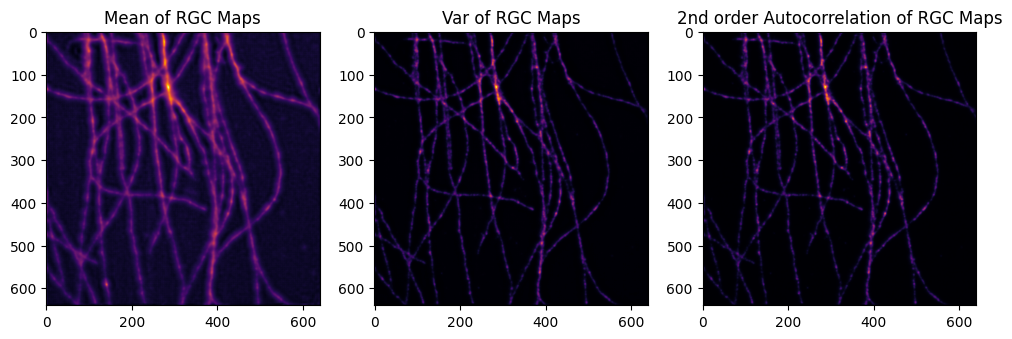

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(mean_correlation, cmap="inferno")
axs[0].set_title('Mean of RGC Maps')

axs[1].imshow(var_correlation, cmap="inferno")
axs[1].set_title('Var of RGC Maps')

axs[2].imshow(tac2_correlation, cmap="inferno")
axs[2].set_title('2nd order Autocorrelation of RGC Maps')

plt.show()